In [1]:
import pandas as pd
import os

In [2]:
Id = []
import numpy as np
#data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r"E:\LiveProject\Deep_Learning\farm_insects\data"):
    for filename in filenames:
        Id.append(os.path.join(dirname, filename))
Id[:5]

['E:\\LiveProject\\Deep_Learning\\farm_insects\\data\\Africanized Honey Bees (Killer Bees)\\Image_1.jpg',
 'E:\\LiveProject\\Deep_Learning\\farm_insects\\data\\Africanized Honey Bees (Killer Bees)\\Image_10.jpg',
 'E:\\LiveProject\\Deep_Learning\\farm_insects\\data\\Africanized Honey Bees (Killer Bees)\\Image_100.jpg',
 'E:\\LiveProject\\Deep_Learning\\farm_insects\\data\\Africanized Honey Bees (Killer Bees)\\Image_102.jpg',
 'E:\\LiveProject\\Deep_Learning\\farm_insects\\data\\Africanized Honey Bees (Killer Bees)\\Image_104.jpg']

In [3]:
df=pd.DataFrame()
df=df.assign(filename=Id)
df.head()

,filename
0,E:\LiveProject\Deep_Learning\farm_insects\data...
1,E:\LiveProject\Deep_Learning\farm_insects\data...
2,E:\LiveProject\Deep_Learning\farm_insects\data...
3,E:\LiveProject\Deep_Learning\farm_insects\data...
4,E:\LiveProject\Deep_Learning\farm_insects\data...


In [4]:
df. shape

(1591, 1)

In [5]:
df['label']=df['filename']
df['label']=df['label']. str. replace(r"E:\\LiveProject\\Deep_Learning\\farm_insects\\data", '')
df.head()

C:\Users\debna\AppData\Local\Temp\ipykernel_10124\1560752447.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['label']=df['label']. str. replace(r"E:\\LiveProject\\Deep_Learning\\farm_insects\\data", '')


,filename,label
0,E:\LiveProject\Deep_Learning\farm_insects\data...,\Africanized Honey Bees (Killer Bees)\Image_1.jpg
1,E:\LiveProject\Deep_Learning\farm_insects\data...,\Africanized Honey Bees (Killer Bees)\Image_10...
2,E:\LiveProject\Deep_Learning\farm_insects\data...,\Africanized Honey Bees (Killer Bees)\Image_10...
3,E:\LiveProject\Deep_Learning\farm_insects\data...,\Africanized Honey Bees (Killer Bees)\Image_10...
4,E:\LiveProject\Deep_Learning\farm_insects\data...,\Africanized Honey Bees (Killer Bees)\Image_10...


In [6]:
# Removing the unwanted values like ?/
import re
pattern = r"\\([^\\]+)"
df['label'] = df['label'].str.extract(pattern, expand=False)

In [7]:
df. label. value_counts()

Spider Mites                            119
Corn Borers                             115
Brown Marmorated Stink Bugs             114
Fall Armyworms                          113
Colorado Potato Beetles                 112
Corn Earworms                           110
Thrips                                  109
Tomato Hornworms                        109
Cabbage Loopers                         104
Citrus Canker                           104
Fruit Flies                             101
Western Corn Rootworms                  100
Africanized Honey Bees (Killer Bees)     97
Armyworms                                96
Aphids                                   88
Name: label, dtype: int64

In [8]:
# Replace the label
df['label'] = df['label'].replace('Africanized Honey Bees (Killer Bees)', 'Africanized Honey Bees Killer Bees')

In [9]:
unique_labels = df['label'].unique()
print(unique_labels)

['Africanized Honey Bees Killer Bees' 'Aphids' 'Armyworms'
 'Brown Marmorated Stink Bugs' 'Cabbage Loopers' 'Citrus Canker'
 'Colorado Potato Beetles' 'Corn Borers' 'Corn Earworms' 'Fall Armyworms'
 'Fruit Flies' 'Spider Mites' 'Thrips' 'Tomato Hornworms'
 'Western Corn Rootworms']


In [ ]:
#df. to_csv("Dangerous Farm Insects Dataset.csv", index = False)

<Axes: xlabel='label', ylabel='count'>

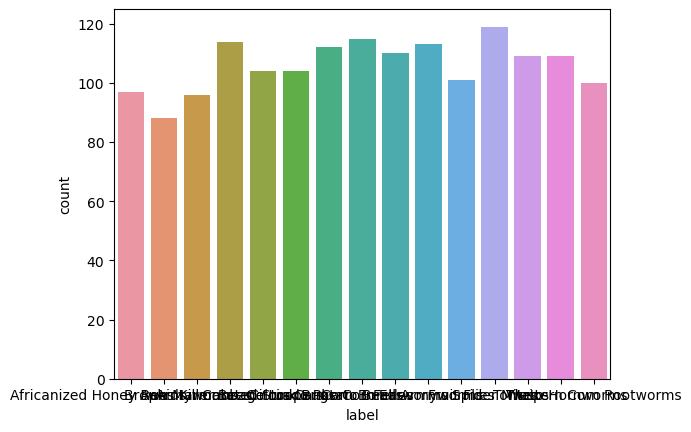

In [10]:
import seaborn as sns
sns. countplot(x = df["label"])

In [11]:
import numpy as np
import seaborn as sns
import matplotlib. pylab as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.utils import class_weight
from tensorflow.keras.applications import VGG19

In [12]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Pre-process the data

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col="filename",
                                                    y_col="label",
                                                    target_size=(200, 200),
                                                    batch_size=32,
                                                    class_mode="categorical")

Found 1262 validated image filenames belonging to 15 classes.


C:\Users\debna\anaconda3\lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 10 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [17]:
import os

invalid_images = []

for filename in train_df["filename"]:
    if not os.path.exists(filename):
        invalid_images.append(filename)

print("Invalid Images:")
for image in invalid_images:
    print(image)

Invalid Images:


In [18]:
test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col="filename",
                                                  y_col="label",
                                                  target_size=(200, 200),
                                                  batch_size=32,
                                                  class_mode="categorical")

Found 317 validated image filenames belonging to 15 classes.


C:\Users\debna\anaconda3\lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [19]:
# Build a deep learning model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit_generator(train_generator, epochs=100, validation_data=test_generator)

C:\Users\debna\AppData\Local\Temp\ipykernel_10124\1454701016.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=100, validation_data=test_generator)


Epoch 1/100
 2/40 [>.............................] - ETA: 1:23 - loss: 3.5851 - accuracy: 0.0781

C:\Users\debna\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


40/40 [==============================] - 101s 2s/step - loss: 2.7760 - accuracy: 0.0761 - val_loss: 2.7052 - val_accuracy: 0.0536
Epoch 2/100
40/40 [==============================] - 97s 2s/step - loss: 2.6978 - accuracy: 0.0729 - val_loss: 2.6931 - val_accuracy: 0.0915
Epoch 3/100
40/40 [==============================] - 101s 3s/step - loss: 2.6757 - accuracy: 0.0990 - val_loss: 2.6613 - val_accuracy: 0.1420
Epoch 4/100
40/40 [==============================] - 99s 2s/step - loss: 2.6028 - accuracy: 0.1268 - val_loss: 2.7062 - val_accuracy: 0.1388
Epoch 5/100
40/40 [==============================] - 97s 2s/step - loss: 2.5691 - accuracy: 0.1561 - val_loss: 2.5958 - val_accuracy: 0.1577
Epoch 6/100
40/40 [==============================] - 97s 2s/step - loss: 2.4602 - accuracy: 0.2036 - val_loss: 2.5857 - val_accuracy: 0.1514
Epoch 7/100
40/40 [==============================] - 93s 2s/step - loss: 2.2816 - accuracy: 0.2520 - val_loss: 2.4767 - val_accuracy: 0.2366
Epoch 8/100
40/40 [====

In [22]:
num_samples = test_df.shape[0]
num_samples

319

In [23]:
score = model.evaluate(test_generator,
                       steps=num_samples//32+1,
                       )

10/10 [==============================] - 7s 730ms/step - loss: 6.0446 - accuracy: 0.3754


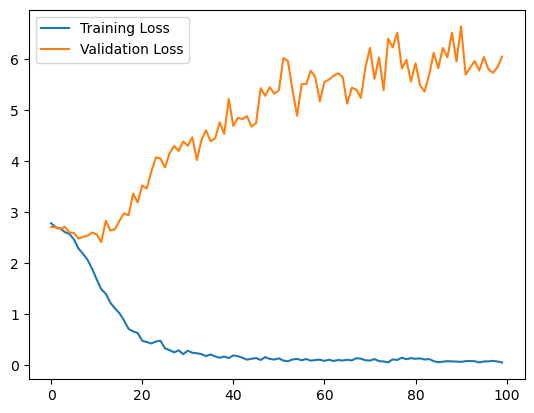

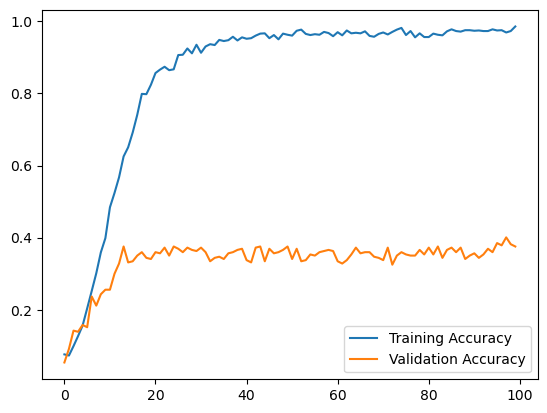

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
import pickle
pickle. dump(model, open("pest.pickle", "wb"))

In [26]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('pest.h1')

INFO:tensorflow:Assets written to: pest.h1\assets


INFO:tensorflow:Assets written to: pest.h1\assets
